In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import joblib

In [5]:
import pandas as pd

# Cargar CSV
df = pd.read_csv("dataset.csv")

# Eliminar columna índice extra si existe
if "Unnamed: 0" in df.columns:
    df = df.drop("Unnamed: 0", axis=1)

# Guardar de nuevo limpio
df.to_csv("dataset_clean.csv", index=False)
print("✅ CSV limpio guardado como dataset_clean.csv")


✅ CSV limpio guardado como dataset_clean.csv


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 256)            │        32,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 82)             │         5,330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,042 (316.57 KB)

 Trainable params: 80,146 (313.07 KB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.3581 - loss: 2.9139 - val_accuracy: 0.9584 - val_loss: 0.3875 - learning_rate: 9.5000e-04
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8760 - loss: 0.6343 - val_accuracy: 0.9887 - val_loss: 0.0926 - learning_rate: 9.0250e-04
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9396 - loss: 0.2904 - val_accuracy: 0.9934 - val_loss: 0.0405 - learning_rate: 8.5737e-04
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9632 - loss: 0.1844 - val_accuracy: 0.9934 - val_loss: 0.0239 - learning_rate: 8.1451e-04
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9733 - loss: 0.1221 - val_accuracy: 0.9967 - val_loss: 0.0137 - learning_rate: 7.7378e-04
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9784 - loss: 0.0970 - val_accuracy: 0.9981 - val_loss: 0.0082 - learning_rate: 7.3509e-04
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - acc

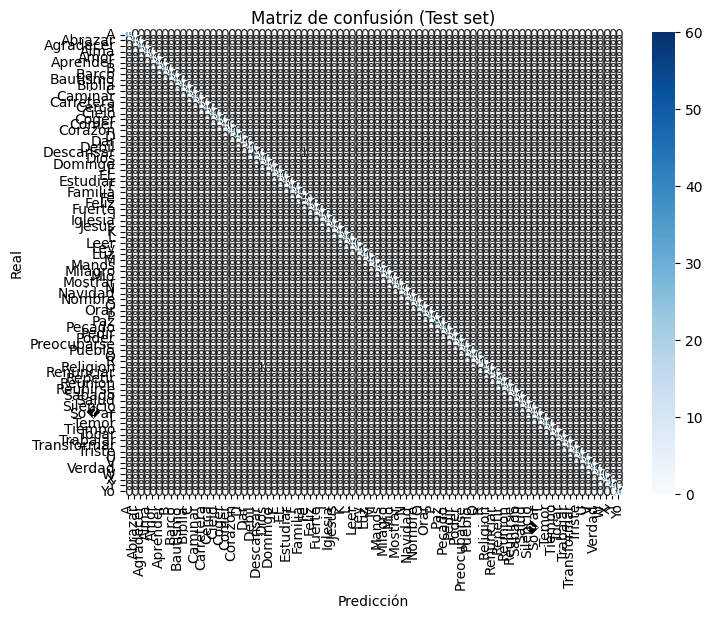


Reporte de clasificación:
              precision    recall  f1-score   support

           A       1.00      1.00      1.00        30
     Abrazar       1.00      1.00      1.00        30
   Agradecer       1.00      1.00      1.00        30
        Alma       1.00      1.00      1.00        30
        Amor       1.00      1.00      1.00        30
    Aprender       1.00      1.00      1.00        30
           B       1.00      1.00      1.00        30
       Barco       1.00      1.00      1.00        30
    Bautismo       1.00      1.00      1.00        30
      Biblia       1.00      1.00      1.00        30
           C       1.00      1.00      1.00        30
     Caminar       1.00      1.00      1.00        30
   Carretera       1.00      1.00      1.00        30
       Cerca       1.00      1.00      1.00        30
       Cielo       1.00      1.00      1.00        30
       Coger       1.00      1.00      1.00        30
       Comer       1.00      1.00      1.00        30


In [6]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks

# ==========================
# 1. Cargar dataset
# ==========================
DATASET_FILE = "dataset_clean.csv"
df = pd.read_csv(DATASET_FILE)

# Features y labels
X = df.drop(columns=["label", "timestamp"]).values.astype(np.float32)
y = df["label"].values

# Codificar labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Escalado de features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Guardar scaler y encoder
joblib.dump(scaler, "scaler.pkl")
joblib.dump(label_encoder, "label_encoder.pkl")

# ==========================
# 2. Split en train/val/test
# ==========================
# Primero separar test (usuarios distintos idealmente, ahora random)
X_temp, X_test, y_temp, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.15, stratify=y_encoded, random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.15, stratify=y_temp, random_state=42
)

num_classes = len(np.unique(y_encoded))

# ==========================
# 3. Construir modelo MLP
# ==========================
def build_mlp(input_dim, num_classes):
    model = models.Sequential([
        layers.Input(shape=(input_dim,)),

        layers.Dense(256, activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.3),

        layers.Dense(128, activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.3),

        layers.Dense(64, activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.2),

        layers.Dense(num_classes, activation="softmax")
    ])
    return model

model = build_mlp(X_train.shape[1], num_classes)
model.summary()

# ==========================
# 4. Callbacks
# ==========================
early_stop = callbacks.EarlyStopping(
    monitor="val_loss", patience=15, restore_best_weights=True
)
checkpoint = callbacks.ModelCheckpoint(
    "best_model.keras", monitor="val_accuracy", save_best_only=True
)

def lr_schedule(epoch, lr):
    return lr * 0.95  # decay suave por época

lr_scheduler = callbacks.LearningRateScheduler(lr_schedule)

# ==========================
# 5. Compilar y entrenar
# ==========================
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop, checkpoint, lr_scheduler],
    verbose=1
)

# ==========================
# 6. Evaluación en test
# ==========================
print("\n📊 Evaluación en test set:")
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.3f}")

# Matriz de confusión
y_pred = np.argmax(model.predict(X_test), axis=1)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de confusión (Test set)")
plt.show()

# Reporte detallado
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


In [3]:
import tensorflow as tf

# Cargar el mejor modelo
model = tf.keras.models.load_model("best_model.keras")

# Convertir a TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Guardar archivo .tflite
with open("sign_model.tflite", "wb") as f:
    f.write(tflite_model)

print("✅ Modelo convertido a sign_model.tflite con input shape:", model.input_shape)


INFO:tensorflow:Assets written to: C:\Users\ledys\AppData\Local\Temp\tmpg5x_61g0\assets


INFO:tensorflow:Assets written to: C:\Users\ledys\AppData\Local\Temp\tmpg5x_61g0\assets


Saved artifact at 'C:\Users\ledys\AppData\Local\Temp\tmpg5x_61g0'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 127), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 82), dtype=tf.float32, name=None)
Captures:
  3034442064192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3034443126160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3034443136016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3034443300928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3034443131264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3034443133728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3034443311840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3034443303568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3034443314656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3034443316416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  30344433132

In [4]:
import joblib, json
scaler = joblib.load("scaler.pkl")

scaler_params = {
    "mean": scaler.mean_.tolist(),
    "scale": scaler.scale_.tolist()
}

with open("scaler_params.json", "w") as f:
    json.dump(scaler_params, f)


In [1]:
import json, joblib
labels = list(joblib.load("label_encoder.pkl").classes_)
with open("labels.json", "w") as f:
    json.dump(labels, f)


In [ ]:
import tensorflow as tf
model = tf.keras.models.load_model("best_model.keras")
print("Input shape:", model.input_shape)


Input shape: (None, 127)


In [12]:
print("Shape de X:", X.shape)


Shape de X: (1400, 127)


#### Probar Camera

In [ ]:
import cv2
import mediapipe as mp
import numpy as np
import tensorflow as tf
import joblib
import time

# ==========================
# 1. Cargar modelo y utilidades
# ==========================
model = tf.keras.models.load_model("best_model.keras")
scaler = joblib.load("scaler.pkl")
label_encoder = joblib.load("label_encoder.pkl")

input_dim = model.input_shape[1]

# ==========================
# 2. Funciones de features
# ==========================
def hand_to_feature_vector(hand_landmarks):
    """Convierte landmarks de MediaPipe en vector normalizado (63-dim)."""
    coords = np.array([[lm.x, lm.y, lm.z] for lm in hand_landmarks.landmark], dtype=np.float32)
    wrist = coords[0].copy()
    coords -= wrist
    scale = np.linalg.norm(coords[9])
    if scale <= 1e-6:
        scale = np.max(np.linalg.norm(coords, axis=1))
        if scale <= 1e-6:
            scale = 1.0
    coords /= scale
    return coords.flatten().tolist()

def sort_hands_by_x(multi_hand_landmarks):
    """Ordena las manos por posición horizontal (izq -> der)."""
    hands = []
    for hand in multi_hand_landmarks:
        coords = np.array([[lm.x, lm.y] for lm in hand.landmark])
        centroid_x = coords[:,0].mean()
        hands.append((centroid_x, hand))
    hands_sorted = [h for _, h in sorted(hands, key=lambda x: x[0])]
    return hands_sorted

# ==========================
# 3. Configuración MediaPipe
# ==========================
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

# ==========================
# 4. Inferencia en vivo
# ==========================
cap = cv2.VideoCapture(0)

with mp_hands.Hands(
    static_image_mode=False,
    max_num_hands=2,
    min_detection_confidence=0.7,
    min_tracking_confidence=0.7
) as hands:
    print("🎥 Iniciando inferencia en vivo... Presiona ESC para salir.")
    time.sleep(2)

    while cap.isOpened():
        success, frame = cap.read()
        if not success:
            continue

        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = hands.process(frame_rgb)
        frame_bgr = cv2.cvtColor(frame_rgb, cv2.COLOR_RGB2BGR)

        row = []
        num_hands = 0
        if results.multi_hand_landmarks:
            num_hands = len(results.multi_hand_landmarks)
            sorted_hands = sort_hands_by_x(results.multi_hand_landmarks)
            for hand_landmarks in sorted_hands:
                row.extend(hand_to_feature_vector(hand_landmarks))
                mp_drawing.draw_landmarks(frame_bgr, hand_landmarks, mp_hands.HAND_CONNECTIONS)

        # rellenar a 2 manos (126 features)
        while len(row) < 126:
            row.append(0.0)

        if any(val != 0.0 for val in row):
            # ➕ ahora incluimos "num_hands"
            features = np.array([row], dtype=np.float32)
            features = np.hstack([features, [[num_hands]]])

            features_scaled = scaler.transform(features)

            pred_probs = model.predict(features_scaled, verbose=0)
            pred_idx = np.argmax(pred_probs)
            pred_label = label_encoder.inverse_transform([pred_idx])[0]
            confidence = float(np.max(pred_probs))

            text = f"{pred_label} ({confidence:.2f})"
            cv2.putText(frame_bgr, text, (30, 50),
                        cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 255, 0), 3)

        cv2.imshow("Sign Recognition - Live", frame_bgr)

        if cv2.waitKey(1) & 0xFF == 27:
            break

cap.release()
cv2.destroyAllWindows()


🎥 Iniciando inferencia en vivo... Presiona ESC para salir.


ValueError: X has 190 features, but StandardScaler is expecting 127 features as input.

: 